# 분류
-----
## 1. 분류
-----
### (1) 지도학습: 회귀 vs 분류

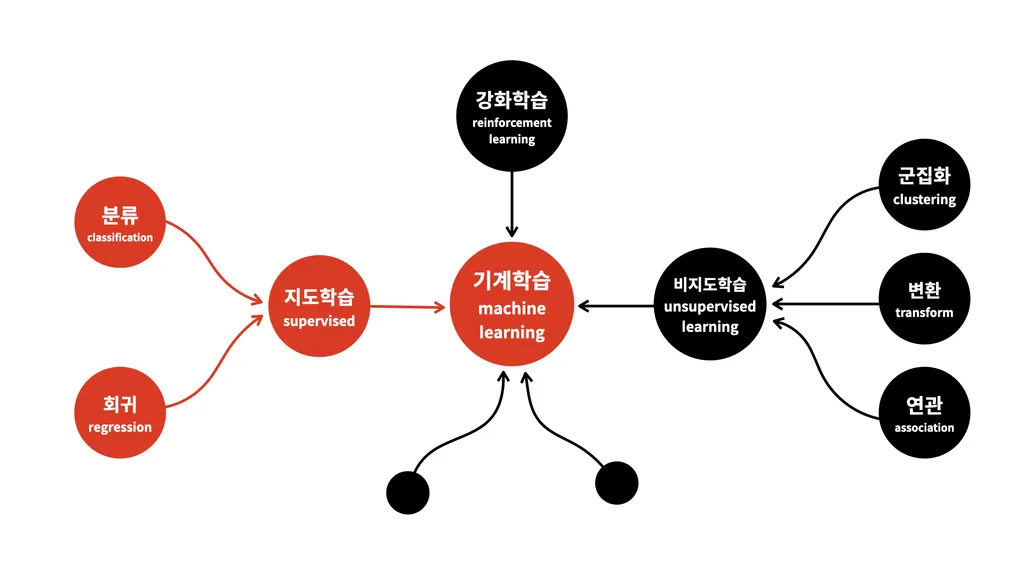

* 분류(Classification): 데이터가 어떤 레이블에 속하는지 패턴을 알고리즘으로 인지한 후, 새로운 데이터에 대한 레이블을 판별하는 것. 즉 종속변수가 범주형일 때 사용한다.

* 회귀: 종속변수가 연속형일 때 사용.

### (2) 이진 분류와 다중 분류
* 이진 분류(Binary Classification): 종속변수가 어떤 기준에 대하여 참/ 거짓 일때.
* 다중 분류(Muliclass Classification): 종속변수가 가질 수 있는 값이 3개 이상일 때.


## 2. 분류 모델
: 분류에 쓰이는 머신러닝 알고리즘

-----
### (1) 로지스틱 회귀     

* **이진 분류 문제**를 푸는 알고리즘. 샘플이 **특정 클래스에 속할 확률을 추정**
* 독립 변수의 선형 회귀에 로지스틱 함수를 적용 -> 출력 값을 0과 1 사이로 변환.
* 즉, 출력이 0과 1 사이의 값을 가지면서 S자 형태인 함수를 이용해야함     
  -> 시그모이드 함수(=로지스틱 함수, Sigmoid function)

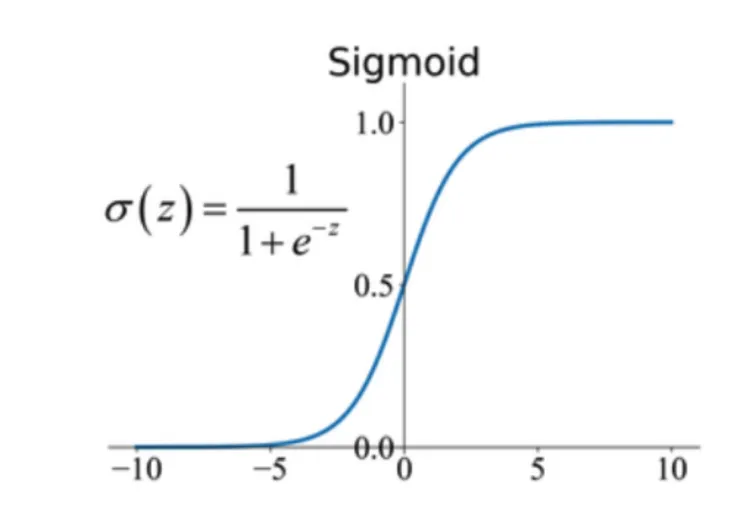

* 시그모이드 함수
  - 입력값($x$)이 ($-\infty,\infty$)일 때, 출력값($y$)은 (0,1)을 가짐.
  - 즉, 출력값이 특정 값 이상이면 1(True) / 특정 값 이하면 0(False)

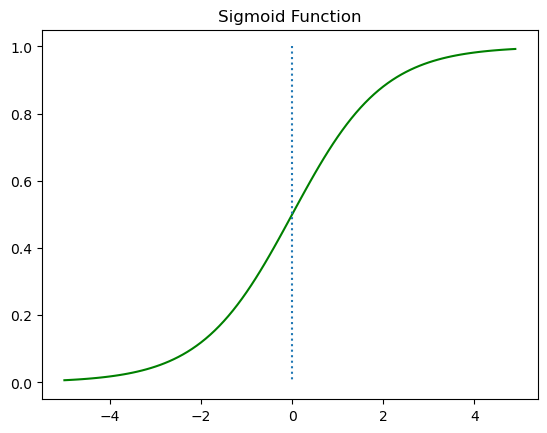

In [1]:
#numpy로 시그모이드 함수 그리기
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1/(1+np.exp(-x)) # 시그모이드 함수 식을 그대로 표현한 것입니다

x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()

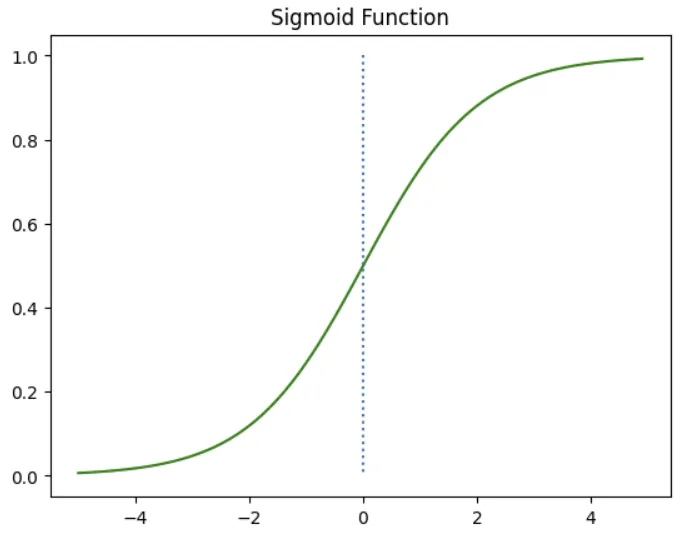

* 시그모이드 함수의 가중치     

  - $H(x)=\frac{1}{1+\exp(-(wx+b))}=sigmoid(wx+b)=\sigma(wx+b)$
  - 인공지능이 주어진 데이터에 적합한 가중치 X와 b를 계산해서 찾는다.

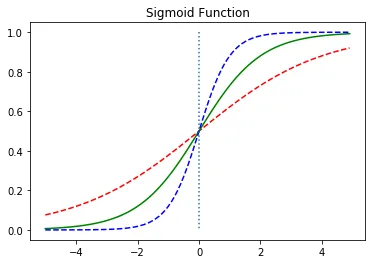

> * **가중치 w의 변화** 에 따른 그래프(기울기) 변화
> * 빨간색: w=0.5 / 초록색: w=1.0 / 파란색: w=2.0

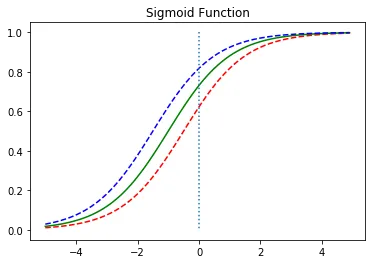

> * **가중치 b의 변화** 에 따른 그래프(위치) 변화
> * 빨간색: b=0.5 / 초록색: b=1.0 / 파란색: b=1.5

* 시그모이드 함수 자세히 알기: **승산(odds)**
  - 승산 = 사건A가 일어날 확률 / 사건A가 일어나지 않을 확률      
     (vs 사건 발생 확률 = 사건A가 일어나는 경우의 수 / 전체 경우의 수)
  - 즉, 승산은 발생할 확률이 발생하지 않을 확률보다 몇 배 더 높은지 알려줌
  - 시그모이드 함수는 비선형성 모델이므로, 승산을 적용하여 모델의 결과를 선형적으로 해석할 수 있게 해줌
  - 아래의 원리이다.

  1.  승산 = $\frac{p(A)}{1-p(A)}$
  2.  logit 함수(직관성 위해 odds의 로그 변환인 logit transform으로 정의.)       
      $logit(p)=\log{(\frac{p(A)}{1-p(A)})}$
  3. 이때 $p(A)=\frac{1}{1+exp(-(wx+b))}$ (sigmoid함수 적용해 모델이 예측한 확률 이므로)
  4. 즉,      
      $ logit(p)=\log{(\frac{p(A)}{1-p(A)})}=\log{(\frac{\frac{1}{1+exp(-(wx+b))}}{1-\frac{1}{1+exp(-(wx+b))}})}=wx+b$

### (2) 의사결정나무 (Decision Tree)
* 의사결정나무: 조건에 따라 데이터를 분류하며, 최종적으로 데이터가 순수한 label의 집합으로 구성될 때 까지 분류를 반복하는 분석. 스무고개 놀이!

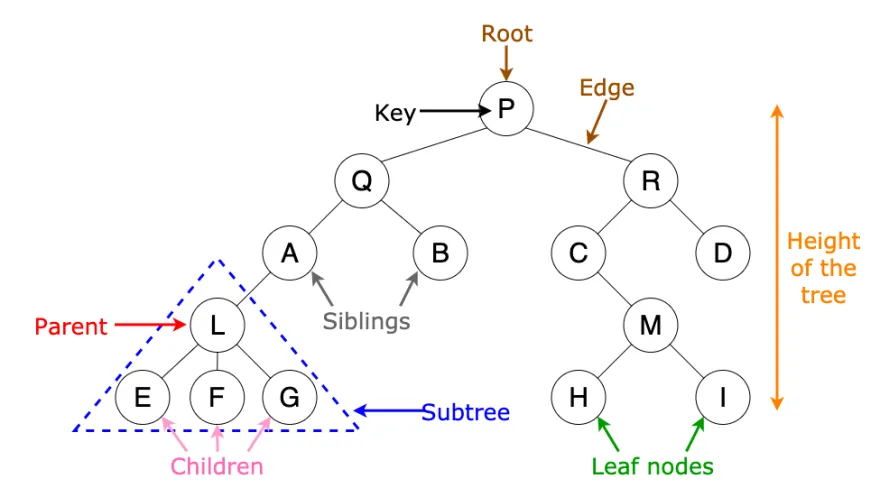

* **CART(이진분할; Classification And Regression Tree)** 알고리즘
  - CART: 데이터셋을 임계값을 기준으로 두 child로 나누는 알고리즘
  - 임계값은 불순도(지니계수)가 낮아지는 방향으로 나눈다.
  - 불순도: 분류하려는 데이터 집합에서 서로 다른 클래스가 섞여있는 정도. 이를 확인하기 위해 지니지수를 사용한다.
  - 지니지수: 불순도를 나타냄. 통계적 분산 정도를 정량화 해서 표현한 값 (0~1사이). 얼마나 불확실한지 알 수 있다.

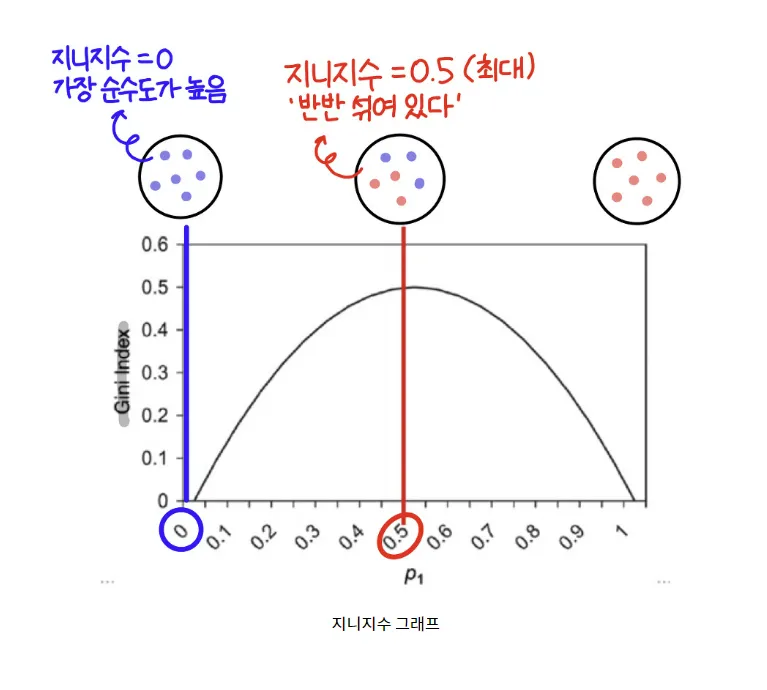

> * $Gini=1-\sum_{i=1}^{n}{P_i^2}$, $P_i$는 class i의 비율.
> * Gini의 최솟값: 0. 데이터가 한 개의 class에만 속하는 경우.
> * Gini의 최댓값: 모든 class가 동일한 비율로 존재하는 경우 (ex. 3개의 class 비율이 모두 33%인 경우, Gini값은 0.67의 최댓값을 가지게 된다)
> * CART알고리즘은 이 Gini계수의 값이 작아지는 방향으로 학습한다.

* CART알고리즘의 주요 단계
  1. 임계값 설정: t(1) ~ t(n-1)의 임계값을 기준으로 R(1)~R(n)의 데이터 그룹으로 나눈다.

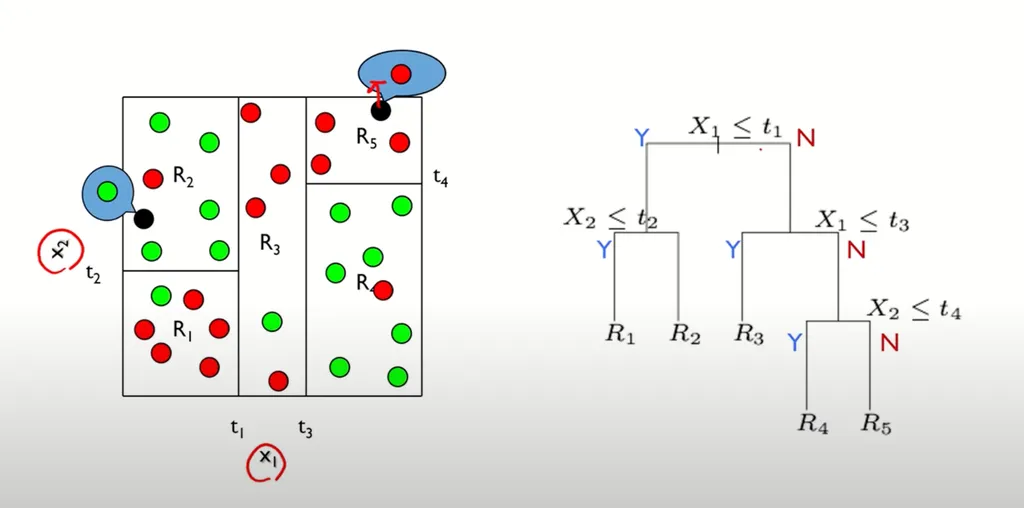

2. 불순도 감소 알고리즘: **"데이터를 어떤 기준으로 분류했을 때 동일한 객체들로만 잘 모아지게 할 수 있는지"** 에 초점을 맞춰서, 불순도가 낮은 쪽으로 가지를 형성해나간다.

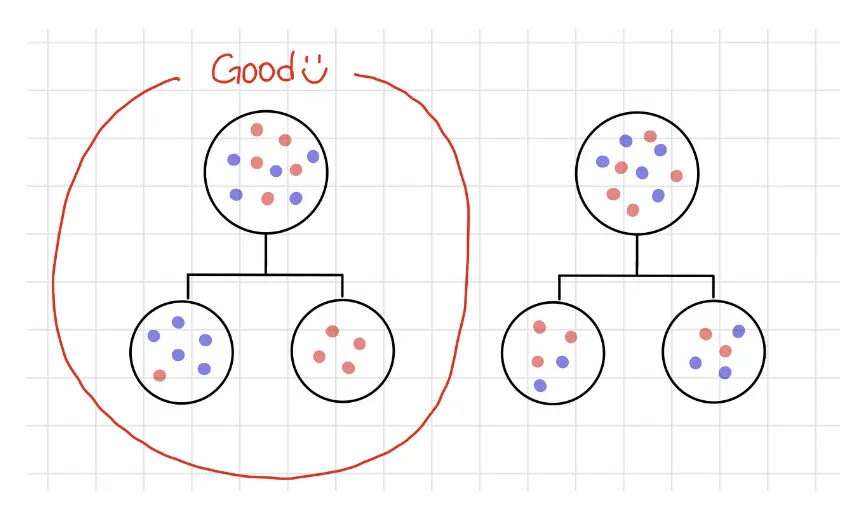

* 실제 학습 시 고려할 것들
  1. Hyperparameter 설정

In [2]:
min_samples_split #분할을 위해 노드가 가져야 할 최소 샘플 수
min_samples_leaf #리프 노드가 가져야 할 최소 샘플 수
min_weight_fraction_leaf #min_samples_split 와 동일, but 가중치가 부여된 전체 샘플 수 에서의 비율
max_leaf_nodes #리프 노드의 최대 개수
max_features #각 노드에서 분할에 사용할 특성의 최대 수

NameError: name 'min_samples_split' is not defined

  2. 시각화: 분류가 잘 이루어졌는지 검토.

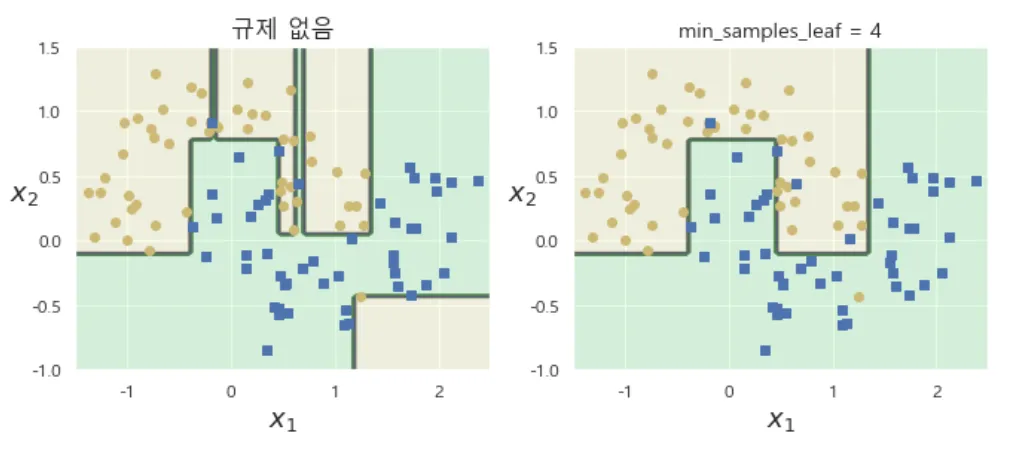

> 왼쪽 그림은 규제가 없어서 과적합 됨/ 오른쪽 그림은 min_samples_leaf 개수를 제어하여 적절히 분류 됨

  3. prunning(가지치기): 불필요한 노드를 지움. 노드가 너무 많아지면 과적합 될 확률이 높아서, 하부 트리를 제거하여 일반화 성능을 증가시킴       
    -> 즉, prunning을 하면 depth감소, 결과의 개수도 감소.

### (3) SVM (Support Vector Machine)
* SVM: 클래스를 분류할 수 있는 다양한 경계선 중 최적의 라인을 찾는 알고리즘.
* **데이터를 분리하는 초평면(Hyperplane)** 중 데이터들과 가장 거리가 먼 초평면을 선택하여 분리하는, 이진 선형 분류 모델.
* 명확하게 분류할 수 있는 데이터에서 좋은 성능. 다수의 feature(고차원 공간)에서도 효과적으로 사용 가능
* SVM의 구성

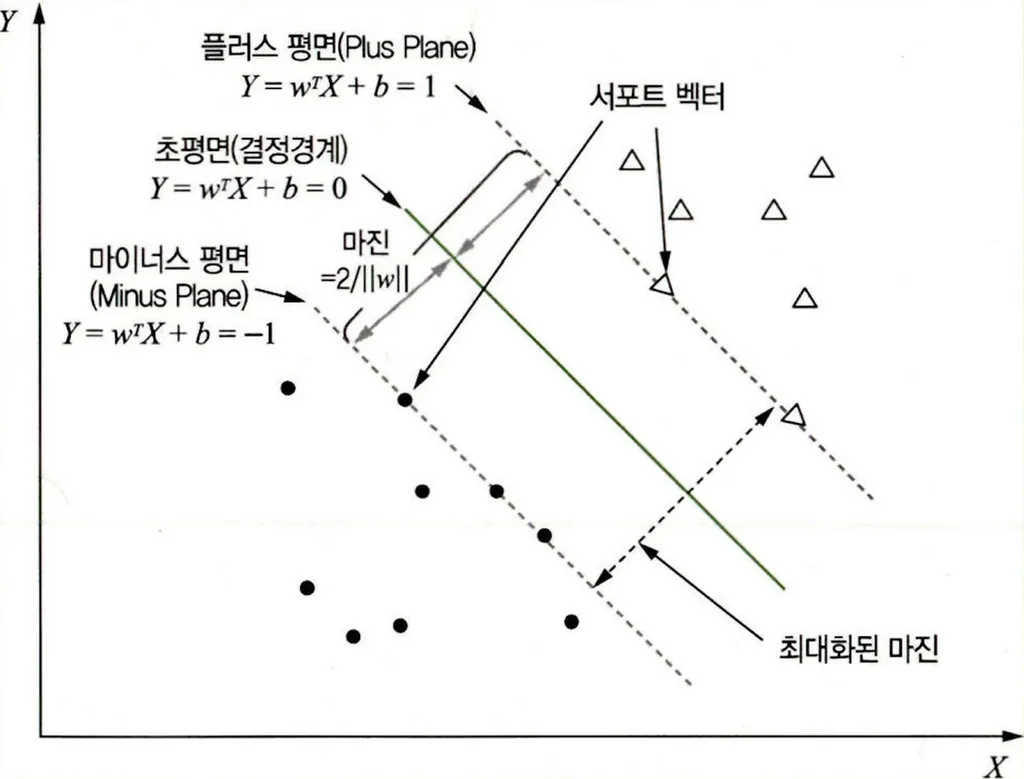

> * Support vector(서포트 벡터): 데이터 중 결정 경계와 가장 가까이 있는 데이터들의 집합.
> * Decision Boundary(결정 경계): 데이터 분류의 기준이 되는 경계
> * Margin(마진): 결정 경계에서 서포트 벡터까지의 거리(여유 공간)
> * Hyperplane(초평면): n차원 공간의 n-1차원 평면.
> * Slack Variables(슬랙변수/여유변수): 완벽한 분리가 불가능할 시 분류를 위해 허용된 오차에 대한 변수.       
>    -> Margin이 가장 큰 경우를 선택함으로써 최적의 선을 찾는다.

* SVM의 장점
   - 서포트 벡터만을 이용해 결정 경계를 생성하므로, 데이터가 적을수록 효과적.
   - 위와 같은 이유로 연산량 최소화됨
   - 비선형 모델 분류 가능
   - 과적합 가능성이 낮고, 노이즈의 영향 낮음
* SVM의 단점
   - 데이터가 많아지면 평가 과정이 많아져 속도 느림.
   - 데이터 전처리가 중요해진다.

### (4) KNN (K-Nearest Neighbor)
* **거리가 가까운 k개의 다른 데이터 레이블을 참조하여 분류** 하는 알고리즘. (비슷한 특성을 가진 데이터끼리 서로 가까이 있다는 점을 이용)
* K개의 이웃 설정 -> 가까운 K개의 데이터를 기반으로 분류.
* KNN 알고리즘 계산 순서
   1. 데이터 준비: **미리 학습하는 과정 없으므로**, 특정 벡터와 레이블(어떤 class인지)로 이루어진 데이터를 준비한다.
   2. K값 설정: 가장 가까운 이웃의 개수. 보통 홀수개로 설정 (동점 발생 방지)
   3. 거리 계산: 예측하려는 데이터가 주어지면, 이 값과 기존 모든 데이터 간의 거리 계산 (유클리드 거리, 맨해튼 거리 이용)
   4. 가장 가까운 K개의 이웃 선택 : 최소거리값 나오는 K개의 데이터 선택
   5. 분류하기: K개의 이웃 중, 최빈 클래스가 예측 결과가 된다.        


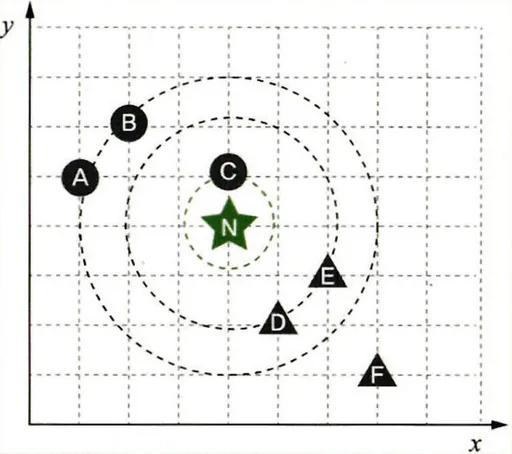


* 그렇다면 최적의 K는 뭐? : 학습용 데이터 개수의 제곱근으로 설정. (너무 크면 과소적합, 너무 작으면 이상치와 이웃이 될 가능성 존재.)
* 동점이 나오는 경우: 동점이 발생한 클래스 중 더 가까운 이웃에 해당하는 클래스로 분류 or 무작위로 하나 선택.
* KNN의 장점
   1. 범주를 나누는 기준 몰라도 데이터 분류 가능
   2. 추가된 데이터의 처리가 용이
   3. 원본 데이터 전체를 그대로 저장 가능
* KNN의 단점
   1. 테스트 데이터의 개수, 학습 데이터의 양에 따라 시간이 오래 걸림.
   2. 수치형 데이터가 아니면 유사도를 정의하기 어려움
   3. 이상치가 존재하면 분류 성능에 큰 영향을 받음.

* 앙상블: 여러 약 분류기(Weak Classifier)를 병렬 혹은 직렬로 결합하여 강 분류기(Strong Classifier)로 만드는 것.        
     -> 각 모델의 예측 결과를 종합하여 최종 예측
     - 보팅: 다른 알고리즘 모델, 병렬
     - 배깅: 동일 알고리즘 모델, 병렬
     - 부스팅: 동일 알고리즘 모델, 직렬(순차적으로)

## 3. 분류 평가 지표

-----
### (1) 혼동 행렬
* 혼동 행렬: 분류 모델의 예측 결과를 정확한 예측과 잘못된 예측으로 구분하여 나타낸 행렬.

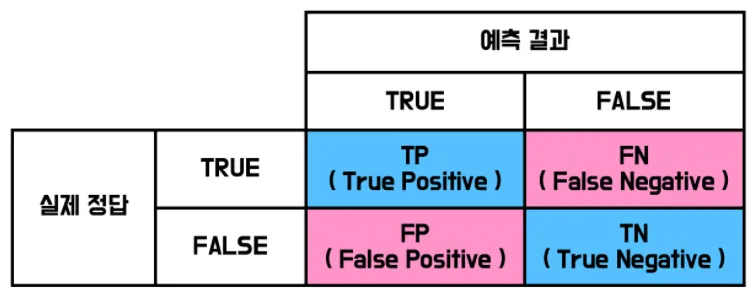

> 파란색: 예측을 올바르게 한 경우(예측값=실제값), 빨간색: 예측을 잘못한 경우 (예측값~=실제값)

|구분|분류 값|설명|
|------|------|------|
|예측이 정확한 경우|TP(True Positive)|참으로 예측한게 참|
| |TN(True Negative)|거짓으로 예측한게 참|
|예측이 틀린 경우|FP(False Positive)|참으로 예측한게 거짓(실제 거짓)|
| |FN(False Negative)|거짓으로 예측한게 거짓(실제 참)|

* 혼동행렬을 이용한 분류 모델 평가 지표
   1. 정확도 (Accuracy)
     - 모든 가능한 예측 중 참인 비율: (TP+TN) / (TP+TN+FP+FN)
     - 정답 레이블의 비율이 불균형할 시 정확도는 신뢰 불가.
   2. 정밀도 (Precision) (0~1)
     - 참이라 예측한 경우, 실제 참인 비율: TP / (TP+FP)
     - 관건은 FP.
     - **거짓을 참으로 판단한 정도** 판별 가능.
     - 정밀도가 높을수록 거짓을 참으로 판단한 정도가 낮다.
     - EX) 스팸 메일 분류기: 정밀도 높여야 함 (일반메일(거짓)을 스팸메일(참)으로 분류한 경우가 치명적이므로.) -> Threshold 증가시켜야함.
   3. 재현도 (Recall) (0~1)
     - 실제로 참인 경우, 참이라 예측한 비율 (즉 **정밀도와 상충관계**이다!): TP / (TP+FN)
     - 관건은 FN.
     - **참을 거짓으로 판단한 정도** 판별 가능.
     - 재현도가 높을수록 참을 거짓으로 예측한 정도가 낮다.
     - EX) 암 환자 판단: 재현도 높여야 함 (암(참)인데 정상(거짓)으로 분류한 경우가 치명적이므로.) -> Threshold 감소시켜야함.

* Threshold(경계값): 모델의 참 거짓을 가르는 분류 기준. 예를 들어 Threshold가 0.7이라면 예측값이 0.7 이상일 때를 참으로 예측한다. (Threshol를 넘으면 참)    
  -> Threshold 증가시키면 참의 비율 낮아짐 -> 정밀도 높아짐 (참 감소)      
  -> Threshold 감소시키면 참의 비율 높아짐 -> 재현도 높아짐 (참 증가)

* 정밀도 & 재현도 그래프        
  : 두 그래프의 교점을 Threshold로 정하면 예측 오류 최소화 가능.

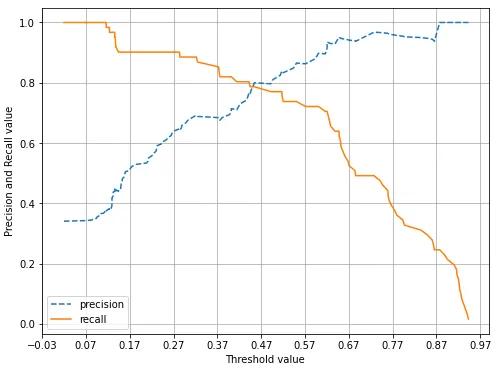

### (2) F1-Score
* F1-score: 정밀도와 재현도의 조화 평균. 둘의 균형을 효과적으로 평가하기 위해 사용.

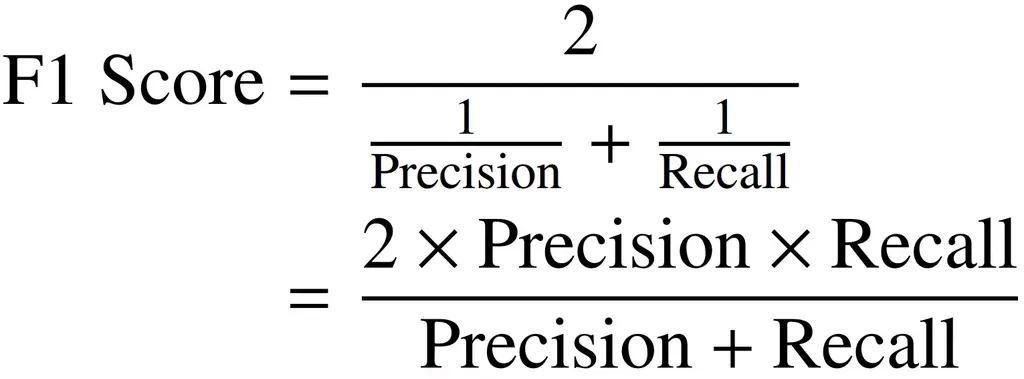

### (3) ROC / AUC Curve
* ROC Curve: 얼마나 분류가 잘 되었는가를 보여주는 그래프.

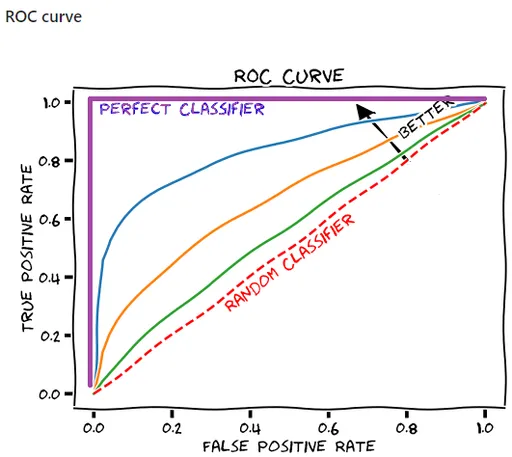

> * TPR(True Positive Rate): 참인 것들 중 참이라 예측한 비율 (=recall)
> * FPR(False Positive Rate): 거짓인 것들 중 참이라 잘못 예측한 비율
> * 좌상단으로 붙어있는 ROC 커브일수록 더 좋은 이진분류기이다.

* AUC Curve: ROC와 x축 사이의 면적 (적분값)

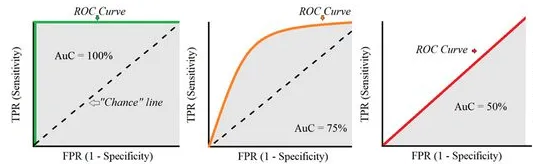

> * 모델의 성능을 수치로 나타낼 수 있음. 0.5~1 사이 값을 가지며 1에 가까울수록 분류 성능이 좋은 것.

## 4. 하이퍼파라미터 최적화

-----
### (1) 하이퍼 파라미터 최적화
* 하이퍼 파라미터: 학습 시작 전 사용자가 직접 설정하는 변수. 어떻게 설정하느냐에 따라 모델의 성능이 달라지므로 최적화가 필요하다.
* Ex) 의사결정나무의 max_depth, random forest의 n_estimators 등
* 하이퍼 파라미터 최적화 과정
   1. 최적 값을 찾고 싶은 하이퍼 파라미터의 범위 설정
   2. 성능 평가 함수 정의
   3. 1단계에서 샘플링한 하이퍼 파라미터 값 사용하여 검증 데이터로 정확도 평가
   4. 위 단계들을 특정 횟수 반복하여, 정확도 결과를 보고 하이퍼 파라미터의 범위를 좁힘

### (2) 하이퍼 파라미터 최적화 방법

1. Grid Search
   -  정해진 범위에서 하이퍼 파라미터 모두 순회하며 가장 좋은 성능 찾는 기법.
   -  최적해를 정확히 찾을 수 있음
   -  시간이 오래 걸림
   -  GridSearchCV (scikitlearn)

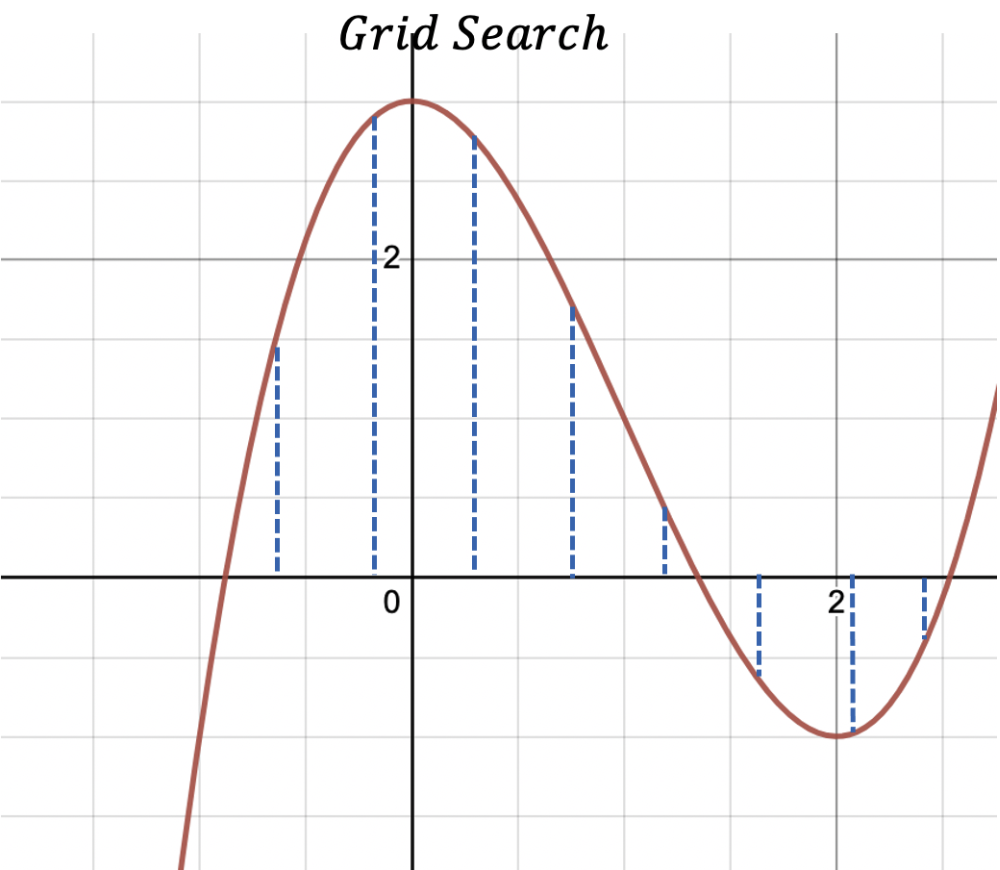

2. Random Search
   - 정해진 범위에서 하이퍼 파라미터 무작위로 탐색해 가장 좋은 성능 찾는 기법.
   - 속도가 grid search보단 빠름
   - 무작위이기 때문에 정확도 떨어짐
   - RandomSearchCV (scikitlearn)

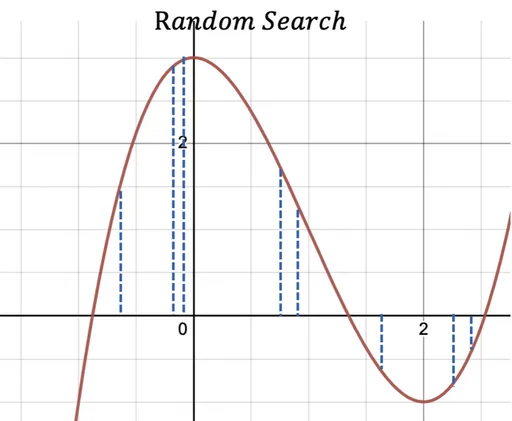

3. Bayesian Optimization
   - 사전 정보를 바탕으로 최적 하이퍼 파라미터 값을 확률적으로 추정하며 탐색하는 기법.
   - 방법
     1. 초기값 몇 개 무작위로 실험
     2. 그 결과를 바탕으로 어떤 파라미터의 조합이 좋을지 확률 모델로 예측
     3. 다음 실험할 조합을 가장 좋을 것 같은 위치로 선택
     4. 결과 반영 후 다시 반복.
   - bates_opt

* 하이퍼 파라미터 최적화 자동화 프레임 워크: Optuma 라이브러리를 활용해 교차 검증 기반으로 모델의 일반화 성능을 평가할 수 있다.